In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.9 MB/s eta 0:00:00


In [ ]:
pip install fredapi

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import pmdarima
from pmdarima import auto_arima
from math import sqrt

In [ ]:
from fredapi import Fred

# Initialize the FRED API client with your API key
fred = Fred(api_key='FRED_API_KEY')

# Define the start date
start_date = '1950-01-01'

# Define the series ID for monthly CPI data
series_id = 'GDPC1'

# Retrieve the monthly CPI data
cpi_data = fred.get_series(series_id, observation_start=start_date)

# Convert the data to a DataFrame
df = pd.DataFrame(cpi_data, columns=['GDPC1'])

# Convert the 'DATE' column to datetime
df.index = pd.to_datetime(df.index)

# Rename the date column to "DATE"
df.rename(columns={'index': 'DATE'}, inplace=True)

# Calculate the year-over-year change in CPI
df['GDP_YoY'] = df['GDPC1'].pct_change(4) * 100

df = df[4:]

# Display the DataFrame with CPI YoY
print(df)

                GDPC1    GDP_YoY
1951-01-01   2593.967  10.564877
1951-04-01   2638.898   9.149921
1951-07-01   2693.259   7.252998
1951-10-01   2699.156   5.468163
1952-01-01   2727.954   5.165332
...               ...        ...
2023-01-01  22112.329   1.717927
2023-04-01  22225.350   2.382468
2023-07-01  22490.692   2.926887
2023-10-01  22679.255   3.134491
2024-01-01  22749.846   2.883084

[293 rows x 2 columns]



# SARIMA

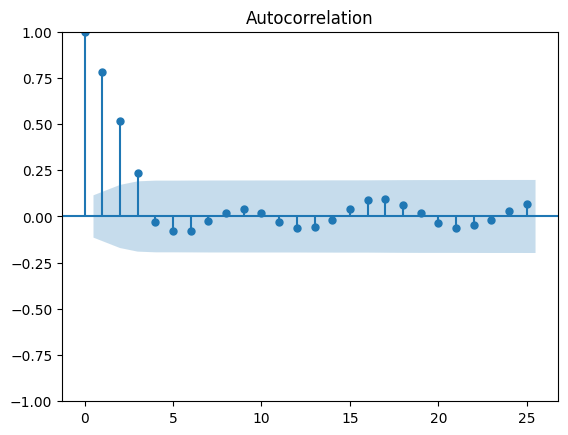

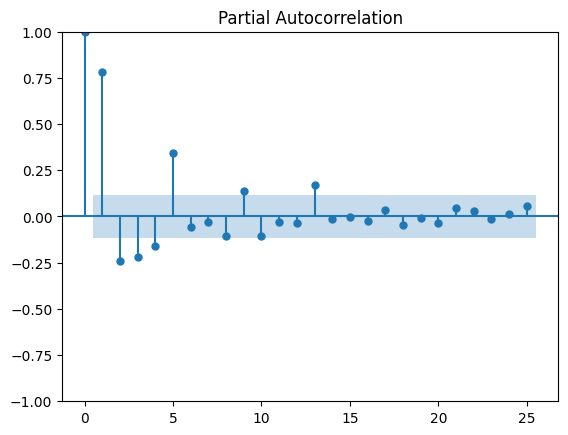

In [ ]:
plot_acf(df['GDP_YoY'])
plt.show()
plot_pacf(df['GDP_YoY'])
plt.show()

In [ ]:
adftest=adfuller(df["GDP_YoY"])
print("P-value of adfuller test is: ", adftest[1])

P-value of adfuller test is:  0.015813877606337783


In [ ]:
import itertools

In [ ]:
p=range(0,4)
q=range(0,4)
d=range(0,6)

In [ ]:
pdq_combination=list(itertools.product(p,d,q))
len(pdq_combination)

96

In [ ]:
rmse=[]
order1=[]

for pdq in pdq_combination:
    try:
        model=ARIMA(train, order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append
        rmse.append(error)
    except:
        continue

In [ ]:
#How to get p,d,q
auto_arima(df['GDP_YoY'], m=4, start_P=0, seasonal=True, d=1, trace=True, error_action="ignore", suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=inf, Time=3.71 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=1115.448, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=1025.660, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=1113.525, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=1112.706, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[4] intercept   : AIC=999.992, Time=0.45 sec
 ARIMA(1,1,0)(2,0,1)[4] intercept   : AIC=inf, Time=2.37 sec
 ARIMA(1,1,0)(1,0,1)[4] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(2,0,0)[4] intercept   : AIC=1002.324, Time=0.18 sec
 ARIMA(2,1,0)(2,0,0)[4] intercept   : AIC=1000.198, Time=0.25 sec
 ARIMA(1,1,1)(2,0,0)[4] intercept   : AIC=1001.042, Time=0.37 sec
 ARIMA(0,1,1)(2,0,0)[4] intercept   : AIC=1000.616, Time=0.21 sec
 ARIMA(2,1,1)(2,0,0)[4] intercept   : AIC=1002.182, Time=0.51 sec
 ARIMA(1,1,0)(2,0,0)[4]             : AIC=998.184, Tim

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(0, 0, 2, 4),
      suppress_warnings=True, with_intercept=False)

In [ ]:
order = (2, 1, 0)  # Ordine non stagionale
seasonal_order = (0, 0, 2, 4)  # Ordine stagionale
model = sm.tsa.SARIMAX(df['GDP_YoY'], order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:                                GDP_YoY   No. Observations:                  293
Model:             SARIMAX(2, 1, 0)x(0, 0, [1, 2], 4)   Log Likelihood                -452.999
Date:                                Wed, 12 Jun 2024   AIC                            915.999
Time:                                        09:08:16   BIC                            934.383
Sample:                                    01-01-1951   HQIC                           923.363
                                         - 01-01-2024                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1201      0.031      3.931      0.000       0.060       0.180
ar.

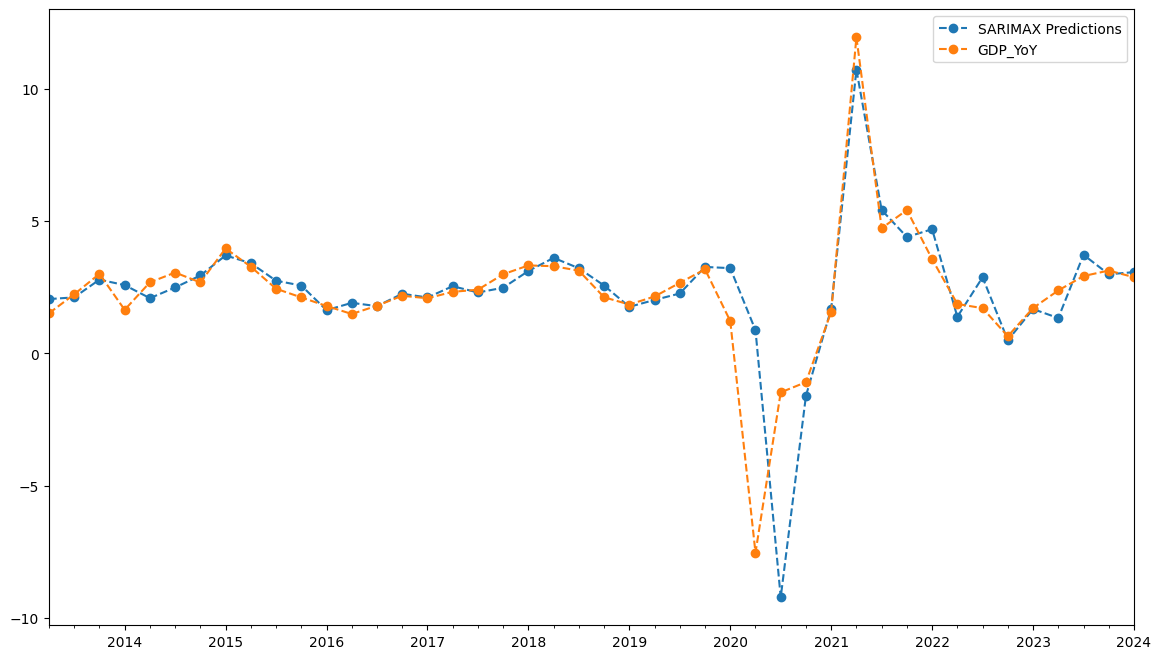

In [ ]:
# Obtain the parameters
params = results.params

# Make predictions
start = len(train)
end = len(train) + len(test) - 1
pred = results.predict(start=start, end=end, typ='levels', params=params).rename('SARIMAX Predictions')

# Plotting
plt.figure(figsize=(14, 8))  # Adjust the figure size here
pred.plot(legend=True, linestyle='--', marker='o')
test['GDP_YoY'].plot(legend=True, linestyle='--', marker='o')

plt.show()

In [ ]:
test['GDP_YoY'].mean()
rmse=sqrt(mean_squared_error(pred[27:35],test['GDP_YoY'][27:35]))
print(rmse)

4.152817815727869


# LSTM


**DATA** **PREPARATION**

In [ ]:
# Convert GDP_YoY to numpy array
gdp_yoy = df['GDP_YoY'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
gdp_yoy_scaled = scaler.fit_transform(gdp_yoy)

# Define function to create dataset for LSTM
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Choose time steps for LSTM
time_step = 4  # You can experiment with different values

# Create the dataset suitable for LSTM
X, y = create_dataset(gdp_yoy_scaled, time_step)

# Reshape input data to be 3D [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
split_ratio = 0.85
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [ ]:
len(y_test)

44

**EPOCHS TUNING**

Training models for 500 epochs
Run 1/5 for 500 epochs
2/2 [==============================] - 1s 5ms/step
Run 2/5 for 500 epochs
2/2 [==============================] - 1s 10ms/step
Run 3/5 for 500 epochs
2/2 [==============================] - 0s 10ms/step
Run 4/5 for 500 epochs
2/2 [==============================] - 0s 7ms/step
Run 5/5 for 500 epochs
2/2 [==============================] - 0s 7ms/step
Training models for 600 epochs
Run 1/5 for 600 epochs
2/2 [==============================] - 0s 5ms/step
Run 2/5 for 600 epochs
2/2 [==============================] - 0s 6ms/step
Run 3/5 for 600 epochs
2/2 [==============================] - 0s 7ms/step
Run 4/5 for 600 epochs
2/2 [==============================] - 0s 7ms/step
Run 5/5 for 600 epochs
2/2 [==============================] - 0s 6ms/step
Training models for 700 epochs
Run 1/5 for 700 epochs
2/2 [==============================] - 0s 7ms/step
Run 2/5 for 700 epochs
2/2 [==============================] - 0s 7ms/step
Run 3/5 for 700 e

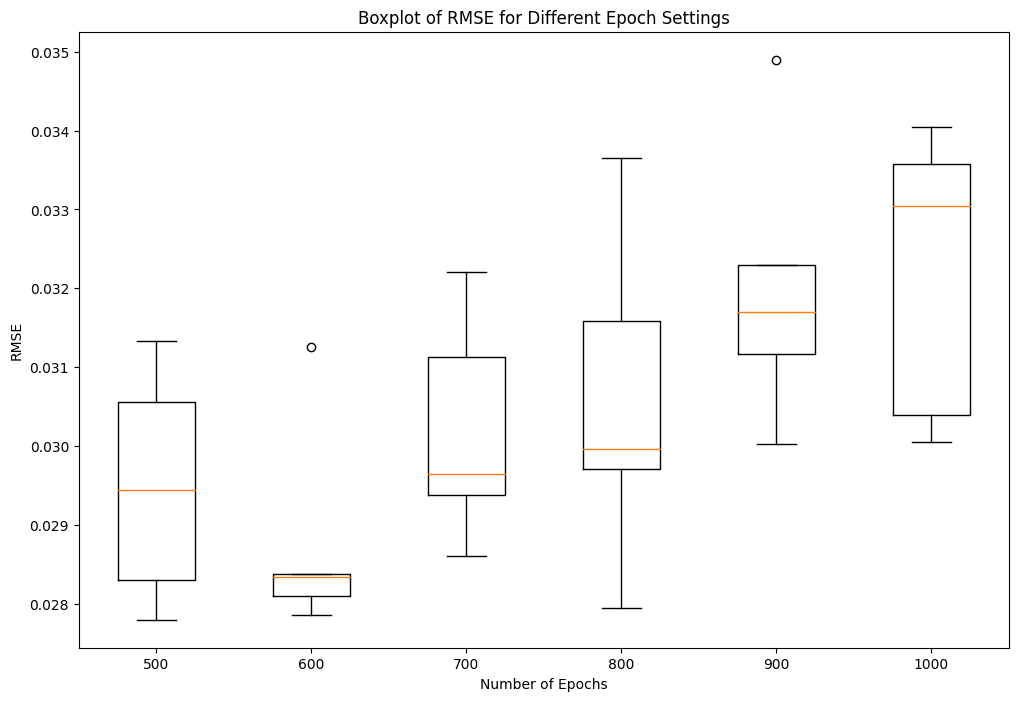

In [ ]:
# Define the number of runs
num_runs = 5

# Epoch settings
epoch_settings = [500, 600, 700, 800, 900, 1000]

# Dictionary to store RMSEs for different epoch settings
rmse_results = {epochs: [] for epochs in epoch_settings}

# Function to create the model
def create_model(time_step):
    model = Sequential()
    model.add(LSTM(units=10, input_shape=(time_step, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

for epochs in epoch_settings:
    print(f"Training models for {epochs} epochs")
    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs} for {epochs} epochs")
        model = create_model(X_train.shape[1])

        # Train the model
        model.fit(X_train, y_train, epochs=epochs, batch_size=64, verbose=0)

        # Predict the values
        y_pred = model.predict(X_test)
        y_test_filtered = np.concatenate((y_test[:27], y_test[35:])) # Excluding 27 to 34, which is 8 values
        y_pred_filtered = np.concatenate((y_pred[:27], y_pred[35:]))

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test_filtered, y_pred_filtered))
        rmse_results[epochs].append(rmse)

# Plot the boxplots of RMSE
plt.figure(figsize=(12, 8))
plt.boxplot([rmse_results[epochs] for epochs in epoch_settings], labels=epoch_settings)
plt.title('Boxplot of RMSE for Different Epoch Settings')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')

plt.show()

**BATCH SIZE TUNING**

Training models with batch size 32 for 600 epochs
Run 1/4 for batch size 32
2/2 [==============================] - 0s 9ms/step
Run 2/4 for batch size 32
2/2 [==============================] - 1s 14ms/step
Run 3/4 for batch size 32
2/2 [==============================] - 0s 7ms/step
Run 4/4 for batch size 32
2/2 [==============================] - 0s 8ms/step
Training models with batch size 64 for 600 epochs
Run 1/4 for batch size 64
2/2 [==============================] - 1s 9ms/step
Run 2/4 for batch size 64
2/2 [==============================] - 0s 10ms/step
Run 3/4 for batch size 64
2/2 [==============================] - 0s 8ms/step
Run 4/4 for batch size 64
2/2 [==============================] - 0s 9ms/step
Training models with batch size 128 for 600 epochs
Run 1/4 for batch size 128
2/2 [==============================] - 0s 9ms/step
Run 2/4 for batch size 128
2/2 [==============================] - 1s 11ms/step
Run 3/4 for batch size 128
2/2 [==============================] - 1s 11ms/

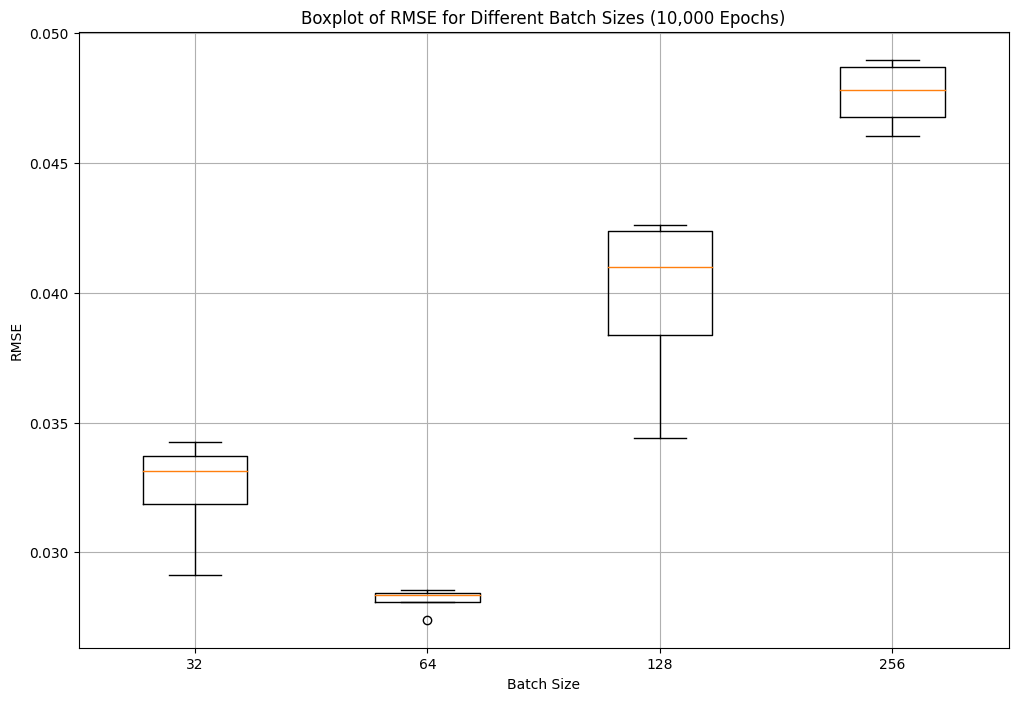

In [ ]:
# Define the number of runs and batch settings
num_runs = 4
batch_settings = [32, 64, 128, 256]
epochs = 600

# Dictionary to store RMSEs for different batch settings
rmse_results = {batch: [] for batch in batch_settings}

# Function to create the model
def create_model(time_step):
    model = Sequential()
    model.add(LSTM(units=10, input_shape=(time_step, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

for batch_size in batch_settings:
    print(f"Training models with batch size {batch_size} for {epochs} epochs")
    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs} for batch size {batch_size}")
        model = create_model(X_train.shape[1])

        # Train the model
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

        # Predict the values
        y_pred = model.predict(X_test)
        y_test_filtered = np.concatenate((y_test[:27], y_test[35:])) # Excluding 27 to 34, which is 8 values
        y_pred_filtered = np.concatenate((y_pred[:27], y_pred[35:]))

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test_filtered, y_pred_filtered))
        rmse_results[batch_size].append(rmse)

# Plot the boxplots of RMSE
plt.figure(figsize=(12, 8))
plt.boxplot([rmse_results[batch] for batch in batch_settings], labels=batch_settings)
plt.title('Boxplot of RMSE for Different Batch Sizes (10,000 Epochs)')
plt.xlabel('Batch Size')
plt.ylabel('RMSE')
plt.grid(True)

plt.show()

**N° OF NEURONS TUNING**




Training models with 5 neurons for 600 epochs
Run 1/4 for 5 neurons
2/2 [==============================] - 0s 8ms/step
Run 2/4 for 5 neurons
2/2 [==============================] - 0s 7ms/step
Run 3/4 for 5 neurons
2/2 [==============================] - 0s 5ms/step
Run 4/4 for 5 neurons
2/2 [==============================] - 0s 7ms/step
Training models with 10 neurons for 600 epochs
Run 1/4 for 10 neurons
2/2 [==============================] - 0s 7ms/step
Run 2/4 for 10 neurons
2/2 [==============================] - 0s 9ms/step
Run 3/4 for 10 neurons
2/2 [==============================] - 0s 6ms/step
Run 4/4 for 10 neurons
2/2 [==============================] - 1s 7ms/step
Training models with 20 neurons for 600 epochs
Run 1/4 for 20 neurons
2/2 [==============================] - 1s 9ms/step
Run 2/4 for 20 neurons
2/2 [==============================] - 1s 6ms/step
Run 3/4 for 20 neurons
2/2 [==============================] - 1s 6ms/step
Run 4/4 for 20 neurons
2/2 [======================

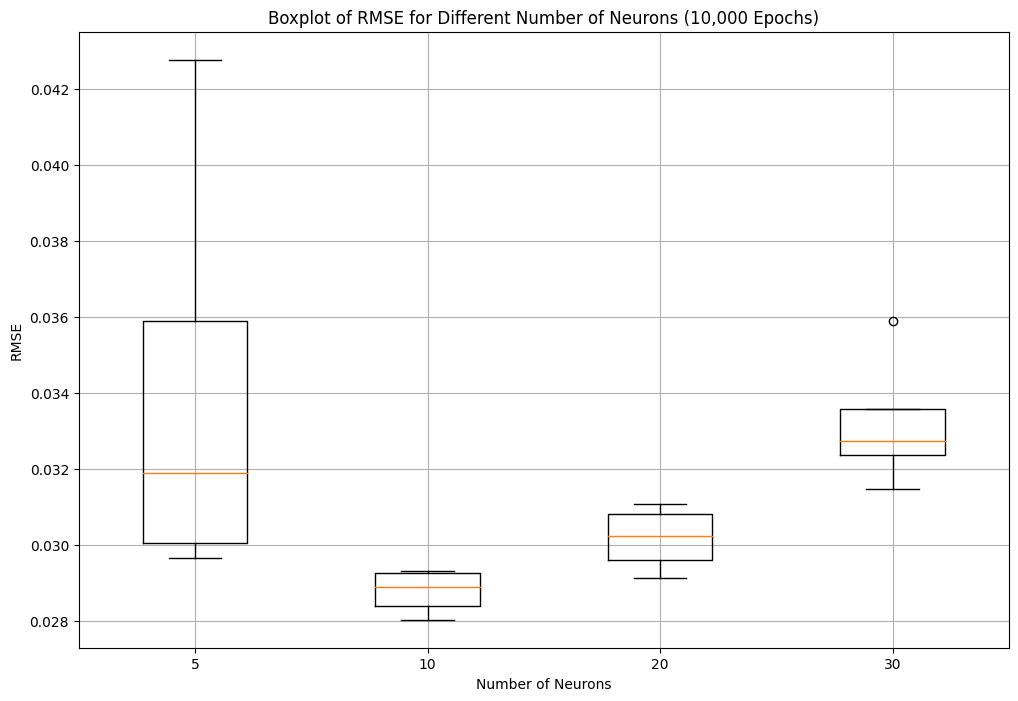

In [ ]:
# Define the number of runs and neuron settings
num_runs = 4
neuron_settings = [5, 10, 20, 30]
batch_size = 64
epochs = 600

# Dictionary to store RMSEs for different neuron settings
rmse_results = {neurons: [] for neurons in neuron_settings}

# Function to create the model
def create_model(time_step, neurons):
    model = Sequential()
    model.add(LSTM(units=neurons, input_shape=(time_step, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

for neurons in neuron_settings:
    print(f"Training models with {neurons} neurons for {epochs} epochs")
    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs} for {neurons} neurons")
        model = create_model(X_train.shape[1], neurons)

        # Train the model
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

        # Predict the values
        y_pred = model.predict(X_test)
        y_test_filtered = np.concatenate((y_test[:27], y_test[35:])) # Excluding 27 to 34, which is 8 values
        y_pred_filtered = np.concatenate((y_pred[:27], y_pred[35:]))

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test_filtered, y_pred_filtered))
        rmse_results[neurons].append(rmse)

# Plot the boxplots of RMSE
plt.figure(figsize=(12, 8))
plt.boxplot([rmse_results[neurons] for neurons in neuron_settings], labels=neuron_settings)
plt.title('Boxplot of RMSE for Different Number of Neurons (10,000 Epochs)')
plt.xlabel('Number of Neurons')
plt.ylabel('RMSE')
plt.grid(True)

plt.show()

Wes set the number of neurons equal to 10

**LAYERS TUNING**

Testing model configuration: 1L-10U
Run 1/5 for configuration 1L-10U
2/2 [==============================] - 0s 7ms/step
Run 2/5 for configuration 1L-10U
2/2 [==============================] - 0s 6ms/step
Run 3/5 for configuration 1L-10U
2/2 [==============================] - 0s 7ms/step
Run 4/5 for configuration 1L-10U
2/2 [==============================] - 0s 5ms/step
Run 5/5 for configuration 1L-10U
2/2 [==============================] - 0s 7ms/step
Testing model configuration: 2L-10U
Run 1/5 for configuration 2L-10U
2/2 [==============================] - 1s 6ms/step
Run 2/5 for configuration 2L-10U
2/2 [==============================] - 1s 7ms/step
Run 3/5 for configuration 2L-10U
2/2 [==============================] - 1s 8ms/step
Run 4/5 for configuration 2L-10U
2/2 [==============================] - 1s 12ms/step
Run 5/5 for configuration 2L-10U
2/2 [==============================] - 1s 7ms/step
Testing model configuration: 3L-10U
Run 1/5 for configuration 3L-10U
2/2 [=============

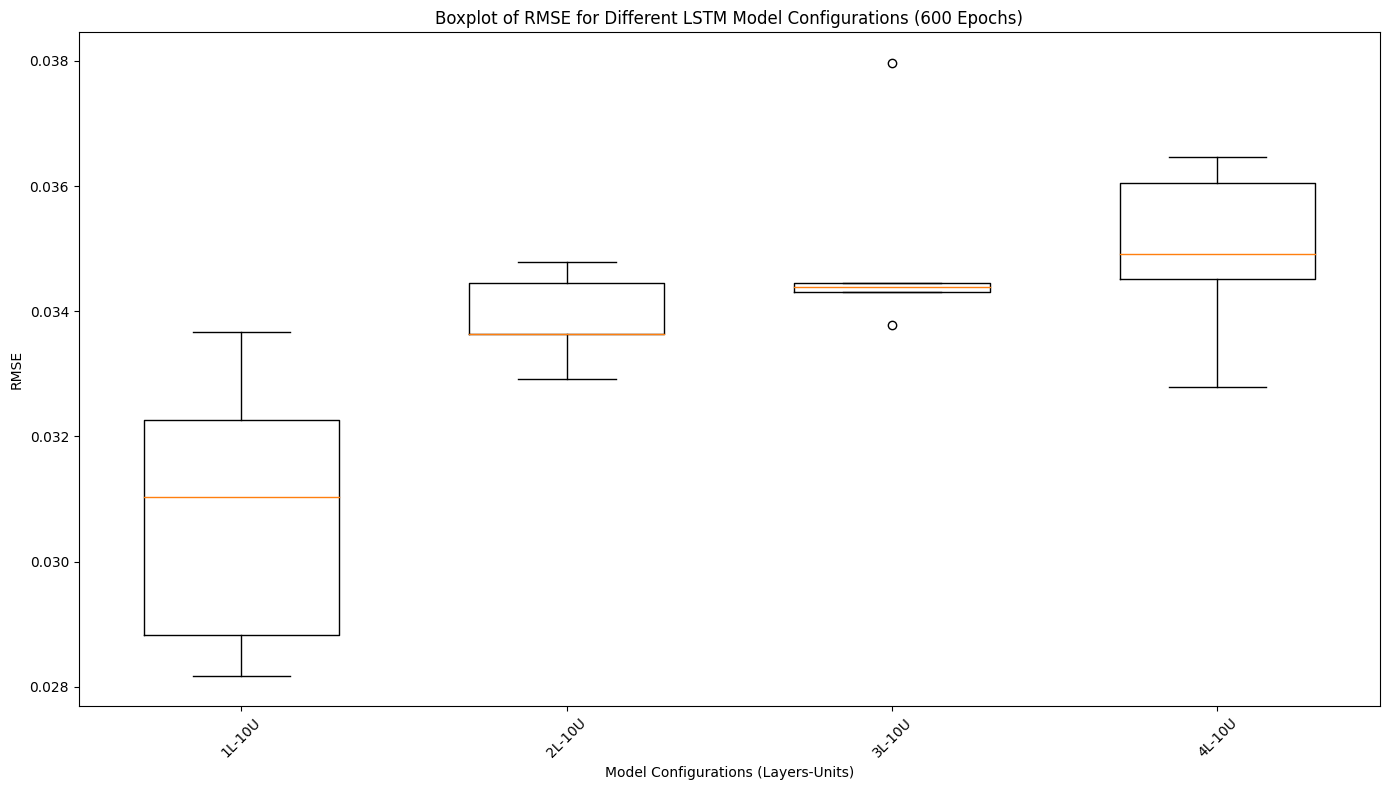

In [ ]:
# Define the number of runs
num_runs = 5

# Number of epochs (fixed)
epochs = 800

# Layer configurations (list of tuples: number of layers, units per layer)
layer_configs = [(1, 10), (2, 10), (3, 10), (4, 10)]  # Example configurations

# Dictionary to store RMSEs for different configurations
rmse_results = {f"{layers}L-{units}U": [] for layers, units in layer_configs}

# Function to create models with varying layers
def create_model(time_step, num_layers, units_per_layer):
    model = Sequential()
    for i in range(num_layers):
        if i == 0:
            # First layer needs input shape
            model.add(LSTM(units=units_per_layer, return_sequences=(i < num_layers - 1), input_shape=(time_step, 1)))
        else:
            # Other layers
            model.add(LSTM(units=units_per_layer, return_sequences=(i < num_layers - 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Assume X_train, y_train, X_test, and y_test are already defined

for layers, units in layer_configs:
    config_name = f"{layers}L-{units}U"
    print(f"Testing model configuration: {config_name}")
    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs} for configuration {config_name}")
        model = create_model(X_train.shape[1], layers, units)

        # Train the model
        model.fit(X_train, y_train, epochs=epochs, batch_size=64, verbose=0)

        # Predict the values
        y_pred = model.predict(X_test)
        y_test_filtered = np.concatenate((y_test[:27], y_test[35:]))  # Excluding 27 to 34, which is 8 values
        y_pred_filtered = np.concatenate((y_pred[:27], y_pred[35:]))

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test_filtered, y_pred_filtered))
        rmse_results[config_name].append(rmse)

# Plot the boxplots of RMSE for different configurations
plt.figure(figsize=(14, 8))
plt.boxplot(
    [rmse_results[config_name] for config_name in rmse_results],
    labels=[config_name for config_name in rmse_results],
    widths=0.6
)
plt.title('Boxplot of RMSE for Different LSTM Model Configurations (600 Epochs)')
plt.xlabel('Model Configurations (Layers-Units)')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**THE FOLLOWING MODEL IS USED TO MAKE PREDICTIONS**


*   Epochs: 600
*   N° of layers : 1
*   Batch size: 64
*   N° of neurons: 10



In [ ]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=10, return_sequences=False, input_shape=(time_step, 1)))  # Use return_sequences=False for the final LSTM layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=600, batch_size=64, verbose=0)  # Setting verbose=0 to suppress the output

# Make predictions
y_pred = model.predict(X_test)

# Flatten predictions
y_pred = y_pred.flatten()

2/2 [==============================] - 0s 7ms/step


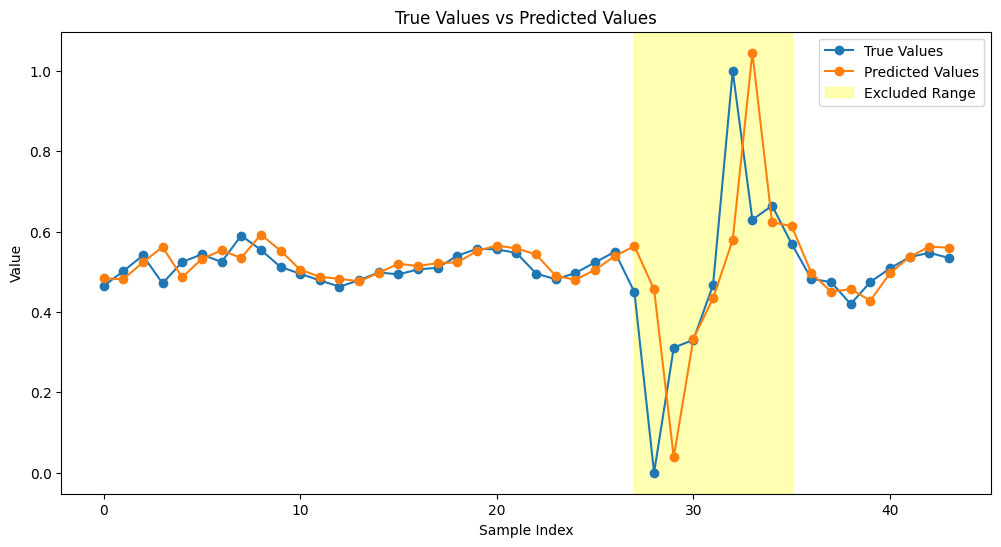

In [ ]:
# Plot the true values versus the predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Values', marker="o")
plt.plot(y_pred, label='Predicted Values', marker="o")
plt.axvspan(27, 35, color='yellow', alpha=0.3, label='Excluded Range')
plt.title('True Values vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()